In [1]:
import operator
import unittest

from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import adjusted_rand_score

from graphs import datasets
from measure.distance import *
from measure.kernel import *
from measure.shortcuts import *
from scorer import rand_index

from tqdm import tqdm_notebook
import matplotlib.pyplot as plt
%matplotlib inline

from scipy.cluster.hierarchy import fcluster, ward
from scipy.linalg import sqrtm
from ward import Ward
from scipy.cluster._hierarchy import nn_chain

In [2]:
d3_category20 = [
    '#aec7e8',
    '#1f77b4',
    '#ffbb78',
    '#ff7f0e',
    '#98df8a',
    '#2ca02c',
    '#ff9896',
    '#d62728',
    '#c5b0d5',
    '#9467bd',
    '#c49c94',
    '#8c564b',
    '#7f7f7f'
] 

In [3]:
def linspace(start, end, count):
    count -= 4
    grid = list(np.linspace(start, end, count))
    step = (end - start) / (count - 1)
    grid.extend([0.1 * step, 0.5 * step, end - 0.1 * step, end - 0.5 * step])
    return grid

## kernel-based Ward (DIY version)


DONE: pWalk H	param: 0.02 score: 0.6898595196737533




C:\Users\illusionww\Documents\GitHub\py_graphs\measure\shortcuts.py:21: RuntimeWarning: divide by zero encountered in log
  return np.log(H0)


Error in Walk H 0.0	| 'NoneType' object has no attribute 'nodes'


C:\Users\illusionww\Anaconda3\lib\site-packages\numpy\core\_methods.py:59: RuntimeWarning: Mean of empty slice.
  warnings.warn("Mean of empty slice.", RuntimeWarning)
C:\Users\illusionww\Anaconda3\lib\site-packages\numpy\core\_methods.py:70: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\illusionww\Documents\GitHub\py_graphs\measure\shortcuts.py:21: RuntimeWarning: invalid value encountered in log
  return np.log(H0)


Error in Walk H 0.02	| 'NoneType' object has no attribute 'nodes'
Error in Walk H 0.04	| 'NoneType' object has no attribute 'nodes'
Error in Walk H 0.002	| 'NoneType' object has no attribute 'nodes'
Error in Walk H 0.01	| 'NoneType' object has no attribute 'nodes'

DONE: Walk H	param: 0.22 score: 0.7183469631697055




C:\Users\illusionww\Documents\GitHub\py_graphs\measure\scale.py:35: RuntimeWarning: divide by zero encountered in double_scalars
  return 0.5 * t / (1.0 - t)
C:\Users\illusionww\Documents\GitHub\py_graphs\measure\kernel.py:66: RuntimeWarning: invalid value encountered in multiply
  return np.linalg.pinv(np.eye(size) + t * getL(A))


Error in For H 1.0	| On entry to DLASCL parameter number 4 had an illegal value

DONE: For H	param: 0.04 score: 0.6652034350034067


Error in logFor H 0.0	| 'NoneType' object has no attribute 'nodes'
Error in logFor H 1.0	| On entry to DLASCL parameter number 4 had an illegal value
Error in logFor H 0.002	| 'NoneType' object has no attribute 'nodes'

DONE: logFor H	param: 0.86 score: 0.6898595196737533


Error in Comm H 1.0	| 'NoneType' object has no attribute 'shape'
Error in Comm H 0.998	| 'NoneType' object has no attribute 'shape'
Error in Comm H 0.99	| 'NoneType' object has no attribute 'shape'

DONE: Comm H	param: 0.02 score: 0.6898595196737533


Error in logComm H 0.0	| 'NoneType' object has no attribute 'nodes'
Error in logComm H 1.0	| 'NoneType' object has no attribute 'log'
Error in logComm H 0.998	| 'NoneType' object has no attribute 'log'
Error in logComm H 0.99	| 'NoneType' object has no attribute 'log'

DONE: logComm H	param: 0.22 score: 0.7183469631697055




C:\Users\illusionww\Documents\GitHub\py_graphs\measure\kernel.py:109: RuntimeWarning: invalid value encountered in multiply
  return expm(-t * getL(A))


Error in Heat H 1.0	| cannot convert float NaN to integer

DONE: Heat H	param: 0.96 score: 0.7084821777789366


Error in logHeat H 0.0	| 'NoneType' object has no attribute 'nodes'
Error in logHeat H 1.0	| cannot convert float NaN to integer

DONE: logHeat H	param: 0.96 score: 0.7084821777789366



DONE: SCT H	param: 0.44 score: 0.6898595196737533



DONE: SCCT H	param: 0.02 score: 0.6934337633869492




C:\Users\illusionww\Documents\GitHub\py_graphs\measure\scale.py:41: RuntimeWarning: divide by zero encountered in double_scalars
  return (1.0 - beta) / beta
C:\Users\illusionww\Documents\GitHub\py_graphs\measure\distance.py:90: RuntimeWarning: invalid value encountered in multiply
  W = Pref * np.exp(-beta * C)


Error in RSP K 0.0	| On entry to DLASCL parameter number 4 had an illegal value


C:\Users\illusionww\Documents\GitHub\py_graphs\measure\distance.py:92: RuntimeWarning: divide by zero encountered in true_divide
  S = (Z.dot(C * W).dot(Z)) / Z
C:\Users\illusionww\Documents\GitHub\py_graphs\measure\distance.py:94: RuntimeWarning: invalid value encountered in add
  Δ_RSP = 0.5 * (C_ + C_.transpose())


Error in RSP K 0.02	| 'NoneType' object has no attribute 'nodes'
Error in RSP K 0.04	| 'NoneType' object has no attribute 'nodes'
Error in RSP K 0.06	| 'NoneType' object has no attribute 'nodes'
Error in RSP K 0.08	| 'NoneType' object has no attribute 'nodes'
Error in RSP K 0.1	| 'NoneType' object has no attribute 'nodes'
Error in RSP K 0.12	| 'NoneType' object has no attribute 'nodes'
Error in RSP K 0.14	| 'NoneType' object has no attribute 'nodes'
Error in RSP K 0.16	| 'NoneType' object has no attribute 'nodes'


C:\Users\illusionww\Documents\GitHub\py_graphs\measure\distance.py:92: RuntimeWarning: invalid value encountered in true_divide
  S = (Z.dot(C * W).dot(Z)) / Z


Error in RSP K 0.002	| 'NoneType' object has no attribute 'nodes'
Error in RSP K 0.01	| 'NoneType' object has no attribute 'nodes'

DONE: RSP K	param: 0.9400000000000001 score: 0.7268379212538431




C:\Users\illusionww\Documents\GitHub\py_graphs\measure\distance.py:114: RuntimeWarning: invalid value encountered in multiply
  W = Pref * np.exp(-beta * C)


Error in FE K 0.0	| On entry to DLASCL parameter number 4 had an illegal value


C:\Users\illusionww\Documents\GitHub\py_graphs\measure\distance.py:118: RuntimeWarning: divide by zero encountered in log
  Φ = np.log(Zh) / -beta
C:\Users\illusionww\Documents\GitHub\py_graphs\measure\distance.py:118: RuntimeWarning: invalid value encountered in log
  Φ = np.log(Zh) / -beta


Error in FE K 0.02	| 'NoneType' object has no attribute 'nodes'
Error in FE K 0.04	| 'NoneType' object has no attribute 'nodes'
Error in FE K 0.06	| 'NoneType' object has no attribute 'nodes'
Error in FE K 0.08	| 'NoneType' object has no attribute 'nodes'
Error in FE K 0.1	| 'NoneType' object has no attribute 'nodes'
Error in FE K 0.12	| 'NoneType' object has no attribute 'nodes'
Error in FE K 0.14	| 'NoneType' object has no attribute 'nodes'
Error in FE K 0.16	| 'NoneType' object has no attribute 'nodes'
Error in FE K 0.18	| 'NoneType' object has no attribute 'nodes'
Error in FE K 0.2	| 'NoneType' object has no attribute 'nodes'


C:\Users\illusionww\Documents\GitHub\py_graphs\measure\distance.py:118: RuntimeWarning: divide by zero encountered in true_divide
  Φ = np.log(Zh) / -beta
C:\Users\illusionww\Documents\GitHub\py_graphs\measure\distance.py:118: RuntimeWarning: invalid value encountered in true_divide
  Φ = np.log(Zh) / -beta
C:\Users\illusionww\Documents\GitHub\py_graphs\measure\distance.py:120: RuntimeWarning: invalid value encountered in subtract
  return Δ_FE - np.diag(np.diag(Δ_FE))


Error in FE K 1.0	| 'NoneType' object has no attribute 'nodes'
Error in FE K 0.002	| 'NoneType' object has no attribute 'nodes'
Error in FE K 0.01	| 'NoneType' object has no attribute 'nodes'

DONE: FE K	param: 0.98 score: 0.6898595196737533



DONE: SP-CT H	param: 0.02 score: 0.6888336748547904




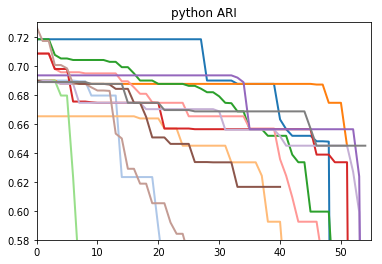

In [34]:
# fig, ax = plt.subplots(1, figsize=(5,3.5))

kbward_data = {}
graphs, info = datasets.polbooks
for m_num, measure in enumerate(Kernel.get_all_H_plus_RSP_FE()):
    measureparamdict = {}
    for param in tqdm_notebook(linspace(0, 1, 55), desc=measure.name):
        mean = []
        for edges, nodes in graphs:
            try:
                D = measure.get_K(edges, measure.scale().calc(edges, param))
                n_clusters=len(list(set(nodes)))
                y_pred = Ward().predict(D, n_clusters)
                ri = adjusted_rand_score(nodes, y_pred)
                mean.append(ri)
            except KeyboardInterrupt:
                raise KeyboardInterrupt()
            except Exception as e:
                print('Error in {} {}\t| {}'.format(measure.name, param, e))
        mean = [m for m in mean if m is not None and m == m]
        score = np.array(mean).mean()
        if score is not None and score == score:
            measureparamdict[param] = score
    maxparam = max(measureparamdict.items(), key=operator.itemgetter(1))[0]
    print("DONE: {}\tparam: {} score: {}\n\n".format(measure.name, maxparam, measureparamdict[maxparam]))
    measureparamdict = np.array(sorted(measureparamdict.items(), key=operator.itemgetter(0)))
    kbward_data[measure.name] = measureparamdict
    plt.plot(range(measureparamdict.shape[0]), sorted(measureparamdict[:, 1])[::-1], color=d3_category20[m_num], label=measure.name, linewidth=2)
plt.xlim(0, 55)
plt.ylim(.58, .73)
plt.title('python ARI')

## distance-based Ward (scipy version)

In [ ]:
def flat_triangle(D):
    newD = []
    for i in range(D.shape[0]):
        for j in range(i + 1, D.shape[0]):
            newD.append(D[i, j])
    assert len(newD) == D.shape[0] * (D.shape[0] - 1) / 2
    return np.array(newD)

In [ ]:
fig, ax = plt.subplots(1, figsize=(5,3.5))

dbward_data = {}
graphs, info = datasets.polbooks
for m_num, measure in enumerate(Distance.get_all()):
    measureparamdict = {}
    for param in tqdm_notebook(linspace(0, 1, 55), desc=measure.name):
        mean = []
        for edges, nodes in graphs:
            try:
                D = measure.get_D(edges, measure.scale().calc(edges, param))
                n_clusters=len(list(set(nodes)))
                
                n = int(D.shape[0] * (D.shape[0] - 1) / 2)
                D = flat_triangle(D)
                
                y_pred = fcluster(ward(D), n_clusters, criterion='maxclust')
                ari = adjusted_rand_score(nodes, y_pred)
                mean.append(ari)
            except KeyboardInterrupt:
                raise KeyboardInterrupt()
            except Exception as e:
                print('Error in {} {}\t| {}'.format(measure.name, param, e))
        mean = [m for m in mean if m is not None and m == m]
        score = np.array(mean).mean()
        if score is not None and score == score:
            measureparamdict[param] = score
    maxparam = max(measureparamdict.items(), key=operator.itemgetter(1))[0]
    print("DONE: {}\tparam: {} score: {}\n\n".format(measure.name, maxparam, measureparamdict[maxparam]))
    measureparamdict = np.array(sorted(measureparamdict.items(), key=operator.itemgetter(0)))
    dbward_data[measure.name] = measureparamdict
    plt.plot(range(measureparamdict.shape[0]), measureparamdict[:, 1], color=d3_category20[m_num], label=measure.name, linewidth=2)
plt.xlim(0, 55)
plt.ylim(0.65, .73)

## object-feature based (sklearn version)

In [ ]:
fig, ax = plt.subplots(1, figsize=(5,3.5))

graphs, info = datasets.polbooks
for m_num, measure in enumerate(Kernel.get_all_H_plus_RSP_FE()):
    measureparamdict = {}
    for param in tqdm_notebook(linspace(0, 1, 55), desc=measure.name):
        mean = []
        for edges, nodes in graphs:
            try:
                D = measure.get_K(edges, measure.scale().calc(edges, param))
                if not is_semipos_def(D):
                    raise Exception('Not positive definite')
                D = sqrtm(D).T
                n_clusters=len(list(set(nodes)))
                y_pred = AgglomerativeClustering(n_clusters=n_clusters).fit_predict(D)
                ari = adjusted_rand_score(nodes, y_pred)
                mean.append(ari)
            except KeyboardInterrupt:
                raise KeyboardInterrupt()
            except Exception as e:
                print('Error in {} {}\t| {}'.format(measure.name, param, e))
        mean = [m for m in mean if m is not None and m == m]
        score = np.array(mean).mean()
        if score is not None and score == score:
            measureparamdict[param] = score
    if len(measureparamdict) == 0:
        print('Not positive devinite ' + measure.name)
        continue
    maxparam = max(measureparamdict.items(), key=operator.itemgetter(1))[0]
    print("DONE: {}\tparam: {} score: {}\n\n".format(measure.name, maxparam, measureparamdict[maxparam]))
    measureparamdict = np.array(sorted(measureparamdict.items(), key=operator.itemgetter(1), reverse=True))
    plt.plot(range(measureparamdict.shape[0]), measureparamdict[:, 1], color=d3_category20[m_num], label=measure.name, linewidth=2)
plt.xlim(0, 55)
plt.ylim(0.64, .73)

## from java

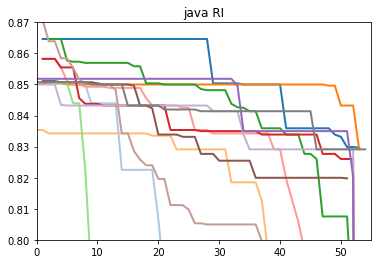

In [33]:
# fig, ax = plt.subplots(1, figsize=(5,3.5))

old_kdward_df = pd.read_csv('polbooks.csv', '\t')
old_kdward_df.index = old_kdward_df['param'].apply(lambda x: "{:1.3f}".format(x))
old_kdward_df = old_kdward_df[old_kdward_df.columns[1:]]
old_kdward_df.head()
for m_num, column in enumerate(['pWalk H', 'Walk H', 'For H', 'logFor H', 'Comm H', 'logComm H',
               'Heat H', 'logHeat H', 'SCT H', 'SCCT H', 'RSP K', 'FE K', 'SP-CT H']):
    plt.plot(range(old_kdward_df.shape[0]), sorted(list(old_kdward_df[column]))[::-1],
             color=d3_category20[m_num], label=measure.name, linewidth=2)
plt.xlim(0, 55)
plt.ylim(0.8, .87)
plt.title('java RI')

# differences

In [5]:
import pandas as pd

In [ ]:
dbward_df = pd.DataFrame()
for measure in dbward_data.keys():
    df2 = pd.DataFrame(dbward_data[measure])
    df2.columns = ['param', measure]
    df2.index = df2['param'].apply(lambda x: "{:1.3f}".format(x))
    dbward_df[measure] = df2[measure]
dbward_df.head()

In [6]:
kbward_df = pd.DataFrame()
for measure in kbward_data.keys():
    df2 = pd.DataFrame(kbward_data[measure])
    df2.columns = ['param', measure]
    df2.index = df2['param'].apply(lambda x: "{:1.3f}".format(x))
    kbward_df[measure] = df2[measure]
kbward_df.head()

,pWalk H,Walk H,For H,logFor H,Comm H,logComm H,Heat H,logHeat H,SCT H,SCCT H,RSP K,FE K,SP-CT H
param,,,,,,,,,,,,,
0.000,0.619231,NaN,0.619231,NaN,0.619231,NaN,0.619231,NaN,0.647070,0.647070,NaN,NaN,0.835348
0.002,0.850366,NaN,0.440110,NaN,0.850366,0.835897,0.440110,0.827656,0.829121,0.851832,NaN,NaN,0.850733
0.010,0.850366,NaN,0.829121,0.85,0.850366,0.835897,0.829121,0.827656,0.829121,0.851832,NaN,NaN,0.850733
0.020,0.850366,NaN,0.812637,0.85,0.850366,0.835897,0.829121,0.827656,0.829121,0.851832,NaN,NaN,0.850733
0.040,0.850366,NaN,0.834249,0.85,0.850366,0.835897,0.812637,0.833883,0.829121,0.851832,NaN,NaN,0.850733


In [7]:
old_kdward_df = pd.read_csv('polbooks.csv', '\t')
old_kdward_df.index = old_kdward_df['param'].apply(lambda x: "{:1.3f}".format(x))
old_kdward_df = old_kdward_df[old_kdward_df.columns[1:]]
old_kdward_df.head()

,logHeat H,Heat H,logFor H,FE K,SP-CT H,Walk H,RSP K,Comm H,pWalk H,SCCT H,SCT H,For H,logComm H,Unnamed: 14
param,,,,,,,,,,,,,,
0.000,NaN,0.622894,NaN,NaN,0.841941,NaN,NaN,0.622894,0.622894,0.459524,0.459524,0.622894,NaN,NaN
0.002,0.827656,0.440110,0.85,NaN,0.850733,0.835897,NaN,0.850366,0.850366,0.851832,0.829121,0.440110,0.835897,NaN
0.010,0.827656,0.829121,0.85,NaN,0.850733,0.835897,0.834249,0.850366,0.850366,0.851832,0.829121,0.829121,0.835897,NaN
0.020,0.827656,0.829121,0.85,0.819780,0.850733,0.835897,0.825824,0.850366,0.850366,0.851832,0.829121,0.812637,0.835897,NaN
0.040,0.833883,0.812637,0.85,0.825458,0.850733,0.835897,0.809707,0.850366,0.850366,0.851832,0.829121,0.834249,0.835897,NaN


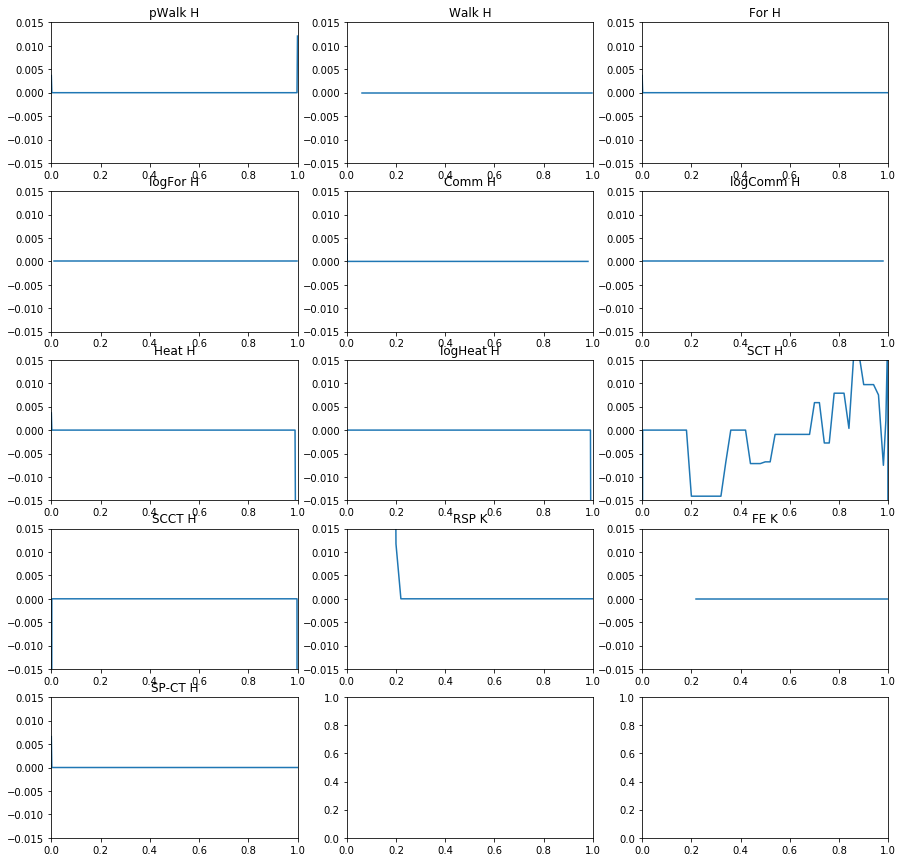

In [13]:
fig, ax = plt.subplots(5, 3, figsize=(15,15))
for idx, measure in enumerate(kbward_data.keys()):
    diff = old_kdward_df[measure] - kbward_df[measure]
    ax[idx//3, idx%3].plot(diff)
    ax[idx//3, idx%3].set_title(measure)
    ax[idx//3, idx%3].set_xlim((0, 1))
    ax[idx//3, idx%3].set_ylim((-0.015, 0.015))

In [16]:
fig, ax = plt.subplots(5, 3, figsize=(15,15))
for idx, measure in enumerate(kbward_data.keys()):
    ax[idx//3, idx%3].plot(old_kdward_df[measure], label='java')
    ax[idx//3, idx%3].plot(kbward_df[measure], '--', label='python')
    ax[idx//3, idx%3].legend()
    ax[idx//3, idx%3].set_title(measure)
    ax[idx//3, idx%3].set_xlim((0, 1))

# reject curve

In [ ]:
edges, nodes = datasets.polbooks[0][0]
measure = pWalk_H()
param = 0.5
K = measure.get_K(edges, measure.scale().calc(edges, param))
n_clusters=len(list(set(nodes)))
y_pred = Ward().predict(K, n_clusters)

RI(nodes, y_pred)

In [ ]:
points = []
for i in range(D.shape[0]):
    for j in range(i + 1, D.shape[1]):
        points.append((D[i, j], nodes[i] == nodes[j]))
points = sorted(points, key=lambda x: x[0])
points = np.array(points)

top_step = 1 / np.sum(points[:, 1])
left_step = 1 / np.sum(points[:, 1] == 0)

steps = [np.zeros(2)]
for point in points:
    steps.append(steps[-1] + ((0, top_step) if point[1] else (left_step, 0)))
steps = np.array(steps)

fig, ax = plt.subplots(1, figsize=(4, 4))
plt.plot(steps[:, 0], steps[:, 1])

In [ ]:
def RI(y_true, y_pred):
    tp, tn, fp, fn = 0, 0, 0, 0
    for i in range(len(y_true)):
        for j in range(len(y_true)):
            if y_true[i] == y_true[j]:
                if y_pred[i] == y_pred[j]:
                    tp += 1
                else:
                    fp += 1
            else:
                if y_pred[i] == y_pred[j]:
                    fn += 1
                else:
                    tn += 1
    return (tp + tn) / (tp + tn + fp + fn)